# Achilles

Author: Moshe Silverstein <br/>
Date: 8-17 <br/>
Data Source: http://portals.broadinstitute.org/achilles/

In [84]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import untility_functions as uf
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [43]:
importlib.reload(uf)

<module 'untility_functions' from '/Users/moshesilverstein/Documents/Harmonizome/Achilles/untility_functions.py'>

# Versions Of Modules In Use

In [44]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Tue Dec 12 11:56:02 2017 EST

# Load Data

In [45]:
matrix = pd.read_csv('Input/Achilles_v2.4.6.rnai.gct', sep='\t', skiprows=2)

In [46]:
matrix.head()

Name Description  22RV1_PROSTATE  \
0  AAAAATGGCATCAACCACCAT_RPS6KA1     RPS6KA1        0.745271   
1    AAACACATTTGGGATGTTCCT_IGF1R       IGF1R        1.547808   
2     AAAGAAGAAGCTGCAATATCT_TSC1        TSC1        1.802590   
3    AAGCGTGCCGTAGACTGTCCA_CHEK1       CHEK1             NaN   
4    AATCTAAGAGAGCTGCCATCG_XRCC5       XRCC5       -2.809293   

   697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  786O_KIDNEY  \
0                               -0.041123    -0.242875   
1                                2.190488     1.813222   
2                                1.536374     1.671655   
3                                     NaN          NaN   
4                               -1.330285    -2.912347   

   A1207_CENTRAL_NERVOUS_SYSTEM  A172_CENTRAL_NERVOUS_SYSTEM  \
0                     -0.720484                     1.114986   
1                      1.055123                     1.711305   
2                      1.749983                     2.372121   
3                           NaN                          NaN   
4                     -0.937037                    -2.063379   

   A204_SOFT_TISSUE  A2058_SKIN  A549_LUNG      ...        TT_OESOPHAGUS  \
0         -0.201683    0.120900  -0.018283      ...             0.114314   
1          0.895790    1.392671   1.508456      ...             1.098053   
2          2.782871    2.166329   1.767422      ...             2.062967   
3               NaN         NaN        NaN      ...            -0.744278   
4         -2.417872   -0.845071  -1.736412      ...            -2.513774   

   TYKNU_OVARY  U178_CENTRAL_NERVOUS_SYSTEM  U251MG_CENTRAL_NERVOUS_SYSTEM  \
0    -0.663695                     1.349817                       0.372243   
1     1.292968                     0.660043                       1.143449   
2     1.339992                     0.516197                       1.865463   
3          NaN                          NaN                            NaN   
4    -2.212275                    -2.655619                      -2.378872   

   U343_CENTRAL_NERVOUS_SYSTEM  U87MG_CENTRAL_NERVOUS_SYSTEM  UOK101_KIDNEY  \
0                     0.535807                     -0.083225      -0.570613   
1                     1.447363                      0.797539      -0.448928   
2                     2.527933                      0.829466       1.786617   
3                          NaN                           NaN            NaN   
4                    -1.977371                     -1.998843      -2.658554   

   VCAP_PROSTATE  YKG1_CENTRAL_NERVOUS_SYSTEM  ZR7530_BREAST  
0      -1.345746                     0.486741      -1.674485  
1      -0.148166                    -0.062247       0.329107  
2       0.653663                     2.098124      -0.144754  
3            NaN                          NaN            NaN  
4      -0.709515                    -1.209283      -2.755154  

[5 rows x 218 columns]

In [47]:
matrix.shape

(57369, 218)

# Load Sample Meta Data

In [48]:
sample_meta = pd.read_csv('Input/Achilles_v2.4.6_v2.19.1_v2.20.1_SampleInfo.txt', sep='\t')

In [49]:
sample_meta.head()

Name Primary Disease  \
0                          22RV1_PROSTATE        Prostate   
1  697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE        Leukemia   
2                             786O_KIDNEY           Renal   
3            A1207_CENTRAL_NERVOUS_SYSTEM             GBM   
4             A172_CENTRAL_NERVOUS_SYSTEM             GBM   

                      Subtype                        Primary Site  \
0          Prostate carcinoma                            prostate   
1                       B-ALL  haematopoietic_and_lymphoid_tissue   
2  Renal clear cell carcinoma                              kidney   
3                glioblastoma              central_nervous_system   
4                glioblastoma              central_nervous_system   

  Primary/Metastasis Culture Medium  Conditions shRNA library  Passage number  \
0            primary  RPMI; 10% FBS    Adherent           55K               8   
1            primary  RPMI; 20% FBS  Suspension           55K               8   
2            primary  RPMI; 10% FBS    Adherent           55K               8   
3                NaN  DMEM; 10% FBS    Adherent           55K               9   
4            primary  EMEM; 10% FBS    Adherent           55K               9   

   Days in culture Observed infection rate  Observed cell representation  \
0               43                      68                    9711335.00   
1               29                      21                   11600000.00   
2               28                      57                   18350322.58   
3               32                      33                   11700000.00   
4               32                      63                   23300000.00   

  Doubling time (hrs)  Mean 75th percentile  RNASeq mutation rate SNP6_CNfile  \
0                  55              3.862775            733.675715         yes   
1                  40              4.180375             68.420662         yes   
2                  24              4.551950            158.258921         yes   
3                  24              4.381733            100.836397         yes   
4                  40              4.249325            139.550059         yes   

  RNAseq_EXPfile      Published  DEMETER batch  
0            yes  Cowley et al.              1  
1            yes  Cowley et al.              1  
2            yes  Cheung et al.              1  
3            yes  Cowley et al.              1  
4            yes  Cowley et al.              1

In [50]:
sample_meta.shape

(503, 19)

# Get Relevent Data

In [51]:
matrix = matrix.iloc[:,1:]

In [52]:
matrix.rename(columns={'Description':'Gene'}, inplace=True)

In [53]:
matrix.set_index('Gene', inplace=True)

In [54]:
lst = []

for col in matrix.columns:
    lst.append(col.split('_')[0])
    
matrix.columns = lst

In [55]:
matrix.head()

22RV1       697      786O     A1207      A172      A204     A2058  \
Gene                                                                            
RPS6KA1  0.745271 -0.041123 -0.242875 -0.720484  1.114986 -0.201683  0.120900   
IGF1R    1.547808  2.190488  1.813222  1.055123  1.711305  0.895790  1.392671   
TSC1     1.802590  1.536374  1.671655  1.749983  2.372121  2.782871  2.166329   
CHEK1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
XRCC5   -2.809293 -1.330285 -2.912347 -0.937037 -2.063379 -2.417872 -0.845071   

             A549      A673      ACHN    ...           TT     TYKNU      U178  \
Gene                                     ...                                    
RPS6KA1 -0.018283  1.145122  0.715434    ...     0.114314 -0.663695  1.349817   
IGF1R    1.508456  1.037740  1.466118    ...     1.098053  1.292968  0.660043   
TSC1     1.767422  2.254810  2.281369    ...     2.062967  1.339992  0.516197   
CHEK1         NaN       NaN       NaN    ...    -0.744278       NaN       NaN   
XRCC5   -1.736412 -2.719721 -1.830852    ...    -2.513774 -2.212275 -2.655619   

           U251MG      U343     U87MG    UOK101      VCAP      YKG1    ZR7530  
Gene                                                                           
RPS6KA1  0.372243  0.535807 -0.083225 -0.570613 -1.345746  0.486741 -1.674485  
IGF1R    1.143449  1.447363  0.797539 -0.448928 -0.148166 -0.062247  0.329107  
TSC1     1.865463  2.527933  0.829466  1.786617  0.653663  2.098124 -0.144754  
CHEK1         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
XRCC5   -2.378872 -1.977371 -1.998843 -2.658554 -0.709515 -1.209283 -2.755154  

[5 rows x 216 columns]

# Histogram of First Tissue

In [56]:
matrix.iloc[:, 0].hist()

# Histogram of First Gene

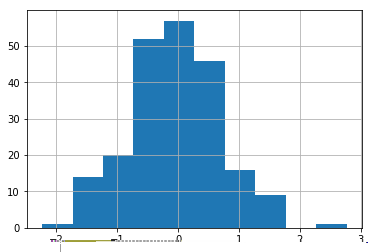

In [57]:
matrix.iloc[0, :].hist()

# Save Unfiltered Sample Matrix To File

In [58]:
filename = 'Output/achilles_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Drop Any Genes That Have Zero Expression Across 95% Of The Samples

In [59]:
matrix.replace(0, np.nan, inplace=True)

In [60]:
matrix.dropna(thresh=(0.05*matrix.shape[1]), axis=0, inplace=True)

In [61]:
matrix.replace(np.nan, 0, inplace=True)

In [62]:
matrix.shape

(57369, 216)

# Log2 Transform

In [63]:
normalized_matrix = uf.log2(matrix)

/Users/moshesilverstein/Documents/Harmonizome/Achilles/untility_functions.py:46: RuntimeWarning: invalid value encountered in log2
  DF = DF.apply(lambda x: np.log2(x+1))


# Nomalize Matrix (z-score the rows)

In [65]:
uf.zscore(normalized_matrix, 'row')

In [66]:
normalized_matrix.head()

22RV1       697      786O     A1207      A172      A204     A2058  \
Gene                                                                           
A1BG    0.150637  0.577257 -1.217437 -0.391899 -0.170805  0.671318 -1.144494   
A1CF   -0.647737  0.805576 -0.357445  1.395020 -0.127047 -0.009082 -1.713388   
A2M    -0.439085  0.071545  0.442089 -0.433158  0.592635  1.093204 -0.376625   
A2ML1   0.414332  0.323890 -0.568790  1.297904 -0.187955  2.055259  0.013900   
A4GALT  0.310171 -1.507275  0.215904  1.631897  0.720867 -0.694243  0.858454   

            A549      A673      ACHN    ...           TT     TYKNU      U178  \
Gene                                    ...                                    
A1BG   -0.054194  1.149890 -0.318264    ...    -0.272460  1.282095  0.675385   
A1CF   -1.012017 -1.480936 -0.683454    ...    -0.745686  0.905955 -1.030863   
A2M     0.243576  0.658250  1.053299    ...     1.123958 -0.595001 -0.542952   
A2ML1   1.165648 -0.151622 -0.599228    ...    -0.781210  1.896407 -0.673152   
A4GALT -0.406138 -0.123815 -0.148920    ...     0.108907 -0.887332 -1.151974   

          U251MG      U343     U87MG    UOK101      VCAP      YKG1    ZR7530  
Gene                                                                          
A1BG   -0.890741  1.163958 -0.682283  0.689297  0.399547 -1.217091 -1.158769  
A1CF    0.362845  1.435050  0.174299 -0.911848 -0.485953  1.654512 -0.343983  
A2M     0.686485  0.083591 -2.257578 -0.465275  1.159367  0.810057  2.559985  
A2ML1  -0.430485  0.957669 -0.963601  0.170557  2.042646 -1.034170  0.832668  
A4GALT  0.375489  0.793452  0.749814  0.544340  0.730073 -0.554642 -0.073100  

[5 rows x 216 columns]

# Merge Like Column (by taking the mean)

In [67]:
normalized_matrix = uf.merge(normalized_matrix, 'column', 'mean')

In [69]:
normalized_matrix.shape

(12281, 216)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [70]:
uf.mapgenesymbols(normalized_matrix)

# Merge Duplicate Genes By Rows¶

In [71]:
normalized_matrix = uf.merge(normalized_matrix, 'row', 'mean')

In [72]:
normalized_matrix.shape

(12279, 216)

# Histogram of First Celline

In [73]:
normalized_matrix.iloc[:, 0].hist()

# Histogram of First Gene

In [75]:
normalized_matrix.iloc[1, :].hist()

# HeatMap (clustergrammer) of Data

In [76]:
net.load_df(normalized_matrix)
net.filter_N_top('row', rank_type='sum', N_top=50)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Filtered Matrix

In [77]:
filename = 'Output/achilles_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [78]:
tertiary_matrix = uf.createTertiaryMarix(normalized_matrix)

In [79]:
tertiary_matrix.head()

22RV1  697  786O  A1207  A172  A204  A2058  A549  A673  ACHN   ...    \
Gene                                                                   ...     
A1BG      0.0  0.0  -1.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0   ...     
A1CF      0.0  0.0   0.0    0.0   0.0   0.0   -1.0   0.0  -1.0   0.0   ...     
A2M       0.0  0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0   0.0   ...     
A2ML1     0.0  0.0   0.0    0.0   0.0   1.0    0.0   0.0   0.0   0.0   ...     
A4GALT    0.0 -1.0   0.0    1.0   0.0   0.0    0.0   0.0   0.0   0.0   ...     

         TT  TYKNU  U178  U251MG  U343  U87MG  UOK101  VCAP  YKG1  ZR7530  
Gene                                                                       
A1BG    0.0    0.0   0.0     0.0   0.0    0.0     0.0   0.0  -1.0     0.0  
A1CF    0.0    0.0   0.0     0.0   0.0    0.0     0.0   0.0   1.0     0.0  
A2M     0.0    0.0   0.0     0.0   0.0   -1.0     0.0   0.0   0.0     1.0  
A2ML1   0.0    1.0   0.0     0.0   0.0    0.0     0.0   1.0   0.0     0.0  
A4GALT  0.0    0.0   0.0     0.0   0.0    0.0     0.0   0.0   0.0     0.0  

[5 rows x 216 columns]

# Save Teriary Matrix

In [80]:
filename = 'Output/achilles_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [81]:
standard_matrix = uf.createStandardizedMatix(normalized_matrix)

In [82]:
standard_matrix.head()

22RV1       697      786O     A1207      A172      A204     A2058  \
Gene                                                                           
A1BG    0.128798  0.413554 -0.805812 -0.289768 -0.131522  0.497996 -0.778412   
A1CF   -0.500079  0.556504 -0.294809  0.749381 -0.096839 -0.007282 -0.940786   
A2M    -0.351692  0.057147  0.347929 -0.319862  0.469374  0.711079 -0.284965   
A2ML1   0.357191  0.241629 -0.460104  0.719678 -0.145795  0.971461  0.011219   
A4GALT  0.273970 -0.878029  0.193487  0.812964  0.558737 -0.573651  0.631515   

            A549      A673      ACHN    ...           TT     TYKNU      U178  \
Gene                                    ...                                    
A1BG   -0.097442  0.770695 -0.250851    ...    -0.198827  0.804457  0.529076   
A1CF   -0.758526 -0.893456 -0.514392    ...    -0.511505  0.575643 -0.745457   
A2M     0.205743  0.507020  0.737837    ...     0.737123 -0.446758 -0.483015   
A2ML1   0.765190 -0.115587 -0.462860    ...    -0.534216  0.942718 -0.559330   
A4GALT -0.384440 -0.096185 -0.123646    ...     0.088099 -0.628576 -0.792384   

          U251MG      U343     U87MG    UOK101      VCAP      YKG1    ZR7530  
Gene                                                                          
A1BG   -0.732777  0.666978 -0.546689  0.500408  0.252654 -0.822871 -0.706085  
A1CF    0.332644  0.754673  0.153712 -0.580677 -0.281967  0.931959 -0.255546  
A2M     0.576227  0.061838 -0.985658 -0.317664  0.639595  0.640170  0.967362  
A2ML1  -0.432654  0.582399 -0.709643  0.110749  0.876166 -0.751176  0.539326  
A4GALT  0.341258  0.501558  0.559127  0.415104  0.470087 -0.449148 -0.039868  

[5 rows x 216 columns]

## Plot of A Single Celltype, Normalized Value vs. Standardized Value  

In [85]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standerdized Matrix 

In [86]:
filename = 'Output/achilles_stansardized_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Path to output files

In [87]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Achilles/Output/'

# Create Up Gene Set Library

In [88]:
name = 'achilles_gene_up_set'

In [89]:
uf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [90]:
name = 'achilles_gene_down_set'

In [91]:
uf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [92]:
name = 'achilles_attribute_up_set'

In [93]:
uf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [94]:
name = 'achilles_attribute_down_set'

In [95]:
uf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Gene Similarity Matrix

In [96]:
gene_similarity_matix = uf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [97]:
gene_similarity_matix.head()

Gene        A1BG      A1CF       A2M     A2ML1    A4GALT     A4GNT      AACS  \
Gene                                                                           
A1BG    1.000000 -0.159641 -0.062173  0.077849 -0.136589 -0.140795  0.056023   
A1CF   -0.159641  1.000000  0.012856  0.024818  0.018352  0.134036 -0.052131   
A2M    -0.062173  0.012856  1.000000  0.053229 -0.177169 -0.143766 -0.010045   
A2ML1   0.077849  0.024818  0.053229  1.000000 -0.150917 -0.045069 -0.053243   
A4GALT -0.136589  0.018352 -0.177169 -0.150917  1.000000  0.083390 -0.042429   

Gene       AADAC     AADAT      AAK1    ...      ZSCAN32    ZSCAN4   ZSCAN5A  \
Gene                                    ...                                    
A1BG   -0.001209  0.141038  0.148191    ...    -0.224909  0.053214  0.018885   
A1CF    0.078772 -0.021134  0.132006    ...     0.055129  0.015786  0.057882   
A2M     0.098668  0.210701 -0.030437    ...     0.009504  0.095373 -0.099673   
A2ML1   0.162486  0.082857 -0.001906    ...     0.107988  0.052065 -0.039779   
A4GALT  0.078808 -0.221758 -0.169829    ...     0.117682 -0.153100  0.101428   

Gene      ZSCAN9    ZSWIM2    ZWILCH    ZYG11A    ZYG11B       ZYX     ZZEF1  
Gene                                                                          
A1BG   -0.069482  0.056352 -0.074837  0.129067  0.129067  0.028711 -0.013245  
A1CF   -0.095813  0.011158  0.000556  0.037792  0.037792 -0.037190  0.196676  
A2M    -0.057722 -0.055443  0.010525  0.057545  0.057545  0.086122 -0.041541  
A2ML1   0.113189 -0.101758 -0.061157  0.400307  0.400307  0.134098  0.052520  
A4GALT -0.176211 -0.104625  0.102026 -0.183212 -0.183212  0.091538 -0.150938  

[5 rows x 12279 columns]

# HeatMap (clustergrammer) of Similarity Matrix

In [100]:
sampling = gene_similarity_matix.iloc[0:100,0:100].copy()

In [101]:
net.load_df(sampling)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Gene Similarity Matrix 

In [102]:
filename = 'Output/achilles_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute Similarity matrix

In [103]:
attribute_similarity_matix = uf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [104]:
attribute_similarity_matix.head()

22RV1       697      786O     A1207      A172      A204     A2058  \
22RV1  1.000000  0.195484 -0.113995 -0.172759  0.020139  0.025500  0.035148   
697    0.195484  1.000000 -0.086878 -0.111971  0.039074  0.073426  0.011499   
786O  -0.113995 -0.086878  1.000000  0.138482  0.032089  0.004802 -0.081416   
A1207 -0.172759 -0.111971  0.138482  1.000000  0.081637  0.169212 -0.215888   
A172   0.020139  0.039074  0.032089  0.081637  1.000000  0.109602  0.055049   

           A549      A673      ACHN    ...           TT     TYKNU      U178  \
22RV1 -0.008468  0.210970  0.034970    ...     0.042769 -0.145756  0.117154   
697   -0.030428  0.250144  0.068673    ...     0.009566 -0.024586  0.117664   
786O   0.065752 -0.128083  0.094786    ...    -0.095760 -0.007577 -0.064134   
A1207  0.049283 -0.069521  0.078529    ...    -0.155931  0.165549  0.040954   
A172   0.070045  0.059361  0.169799    ...    -0.033445 -0.074244  0.158255   

         U251MG      U343     U87MG    UOK101      VCAP      YKG1    ZR7530  
22RV1 -0.033462 -0.081216 -0.055834 -0.074663  0.034490 -0.152299  0.065636  
697   -0.043513  0.015216 -0.028019 -0.053306 -0.013113 -0.150953 -0.101168  
786O   0.040531  0.091961  0.032250  0.219093 -0.064597 -0.017629 -0.027299  
A1207 -0.006530  0.352691  0.096777  0.143040 -0.014867  0.056283 -0.160757  
A172   0.155173  0.145437  0.198928  0.119240 -0.118118  0.114368 -0.119031  

[5 rows x 216 columns]

# HeatMap (clustergrammer) of Similarity Matrix

In [111]:
sampling = attribute_similarity_matix.iloc[0:50,0:50].copy()

In [112]:
net.load_df(sampling)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Attribute Similarity Matrix

In [113]:
filename = 'Output/achilles_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [114]:
gene_list = uf.createGeneList(normalized_matrix)

In [115]:
gene_list.head()

GeneSym  GeneID
0    A1BG       1
1    A1CF   29974
2     A2M       2
3   A2ML1  144568
4  A4GALT   53947

In [116]:
gene_list.shape

(12279, 2)

# Save Gene List

In [117]:
filename = 'Output/achilles_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Attribute List 

In [118]:
attribute_list = uf.createAttributeList(normalized_matrix)

In [119]:
attribute_list.head()

Attributes
0      22RV1
1        697
2       786O
3      A1207
4       A172

In [120]:
attribute_list.shape

(216, 1)

# Save Attribute List

In [121]:
filename = 'Output/achilles_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Gene-Attribute Edge List

In [122]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Achilles/Output/'

In [123]:
name = 'achilles_gene_attribute_edge_list'

In [124]:
uf.createGeneAttributeEdgeList(standard_matrix, gene_list, path, name)

Progeres: 100%  216 Out of 216   

 The number of statisticaly relevent gene-attribute associations is: 2652264
